<a href="https://colab.research.google.com/github/SyedOmarAli/NumberPlateDetectionSystem/blob/main/LicensePlateDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [3]:
uploaded = files.upload("/content/License_Plate_Recognition.v6i.yolov11.zip")

FileExistsError: [Errno 17] File exists: '/content/License_Plate_Recognition.v6i.yolov11.zip'

In [4]:
import zipfile
import os

In [5]:
zip_path = "/content/License_Plate_Recognition.v6i.yolov11.zip"
extract_path = "/content/License_Plate_Recognition_dataset"

In [6]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [7]:
os.listdir(extract_path)

['train',
 'valid',
 'README.dataset.txt',
 'data.yaml',
 'README.roboflow.txt',
 'test']

In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.5 MB/s eta 0:00:00


In [9]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
model = YOLO("yolov8n.pt")

In [13]:
!pwd

/content


In [14]:
!find /content -name data.yaml

/content/License_Plate_Recognition_dataset/data.yaml


In [15]:
model.train(
    data="/content/License_Plate_Recognition_dataset/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/License_Plate_Recognition_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa2603cb620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [19]:
!ls runs/detect/train/weights

In [20]:
!ls runs/detect

train  train2


In [21]:
!ls runs/detect/*/weights

runs/detect/train2/weights:
best.pt  last.pt

runs/detect/train/weights:


In [22]:
model = YOLO("runs/detect/train2/weights/best.pt")

In [27]:
results = model.predict(
    source="/content/License_Plate_Recognition_dataset/valid/images",
    save=True,
    conf=0.5
)


image 1/92 /content/License_Plate_Recognition_dataset/valid/images/021620_142_jpeg_jpg.rf.83b20f53a5f4a54a0b9005ed8946b3d9.jpg: 640x640 2 License-Plates, 8.1ms
image 2/92 /content/License_Plate_Recognition_dataset/valid/images/021620_152b_jpeg_jpg.rf.f2037a2bab90c5b9159ee7ec0ec00732.jpg: 640x640 1 License-Plate, 7.3ms
image 3/92 /content/License_Plate_Recognition_dataset/valid/images/05087525-2018-lexus-ls-500-2_jpeg_jpg.rf.510032b5c31b2243467d8682265b9560.jpg: 640x640 1 License-Plate, 7.2ms
image 4/92 /content/License_Plate_Recognition_dataset/valid/images/146407_7d361741ad2b465285c87e3ead9c56bf_1611083637_jpeg_jpg.rf.1dad4822684dda8080372dc708d05a01.jpg: 640x640 1 License-Plate, 7.2ms
image 5/92 /content/License_Plate_Recognition_dataset/valid/images/2235978325_2ea96dd00c_z_jpeg_jpg.rf.159052ab9bafa740a1371d979481b81f.jpg: 640x640 (no detections), 7.2ms
image 6/92 /content/License_Plate_Recognition_dataset/valid/images/2eff96b0-5234-11e9-9eaf-881ce4aedc87_jpeg_jpg.rf.0a0ed152e0ee59f

In [29]:
from IPython.display import Image, display
import glob

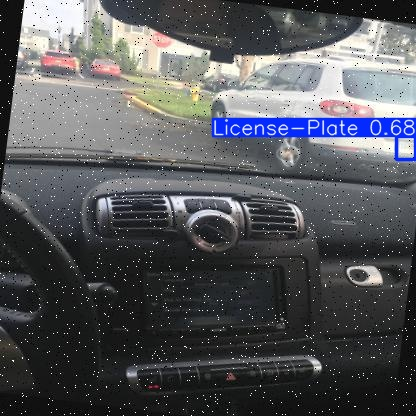

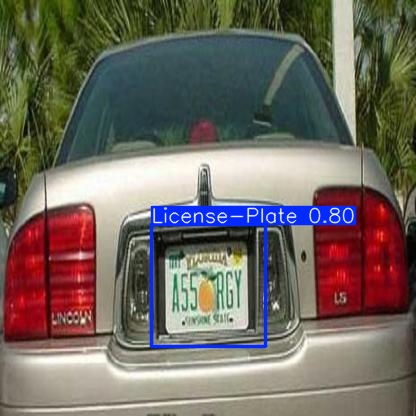

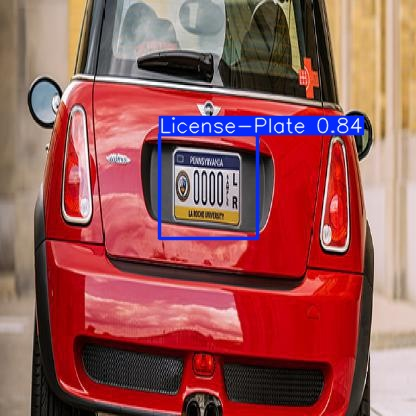

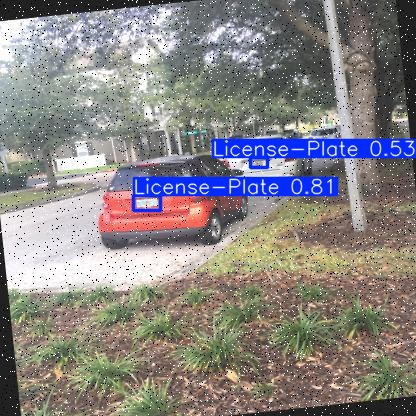

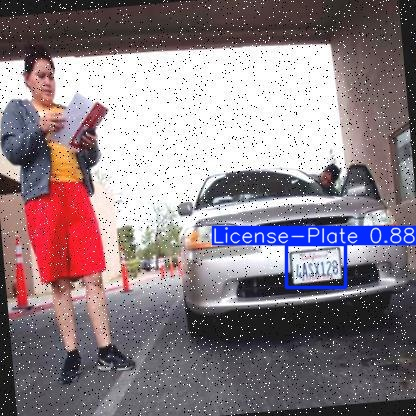

In [30]:
for img in glob.glob("runs/detect/predict/*.jpg")[:5]:
    display(Image(filename=img))

In [31]:
!pip install gradio

In [32]:
from ultralytics import YOLO

model = YOLO("runs/detect/train2/weights/best.pt")

In [33]:
import cv2
import numpy as np

In [35]:
def detect_objects(image):
    # YOLO prediction
    results = model.predict(image, conf=0.5)

    # Bounding boxes drawn
    annotated_image = results[0].plot()

    # BGR → RGB (for Gradio)
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

    return annotated_image

In [36]:
import gradio as gr

In [37]:
interface = gr.Interface(
    fn=detect_objects,
    inputs=gr.Image(type="numpy", label="Upload Image"),
    outputs=gr.Image(type="numpy", label="Detected Output"),
    title="License Plate Detection System",
    description="YOLO-based Object Detection using Deep Learning",
)

In [38]:
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8abbaa61bbcaf065e8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 640x640 1 License-Plate, 8.1ms
Speed: 2.9ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Created dataset file at: .gradio/flagged/dataset1.csv
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://8abbaa61bbcaf065e8.gradio.live
